In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
iris=sns.load_dataset("iris")

In [ ]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
y=iris['species'].values
X=iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [ ]:
from sklearn.model_selection import train_test_split
X_trainval,X_test,y_trainval,y_test=train_test_split(X,y,test_size=0.20)

In [ ]:
df_ytrain=pd.DataFrame(y_trainval)
df_ytest=pd.DataFrame(y_test)

In [ ]:
print("In training Split:")
print(df_ytrain[0].value_counts())

In training Split:
setosa        44
virginica     40
versicolor    36
Name: 0, dtype: int64


In [ ]:
print("In testing Split:")
print(df_ytest[0].value_counts())

In testing Split:
versicolor    14
virginica     10
setosa         6
Name: 0, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#here StandardScaler() means z=(x-u)/s
scaler=StandardScaler().fit(X_trainval)
#scaler=MinMaxScaler().fit(X_trainval)
X_trainval_scaled=scaler.transform(X_trainval)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_trainval_scaled,y_trainval)

DecisionTreeClassifier()

In [ ]:
train_score=classifier.score(X_trainval,y_trainval)
test_score=classifier.score(X_test_scaled,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print("Training Accuracy:", train_score)
print("Test Accuracy:",test_score)

Training Accuracy: 0.3333333333333333
Test Accuracy: 0.9333333333333333


In [ ]:
#predicting the test set result
y_pred=classifier.predict(X_test_scaled)

In [ ]:
print(y_pred)

['versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [ ]:
print(y_test)

['versicolor' 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


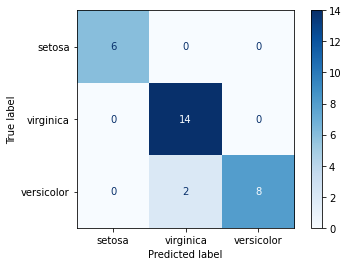

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,
                      X_test_scaled,
                      y_test,
                      display_labels=['setosa','virginica','versicolor'],cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000         6
  versicolor      0.875     1.000     0.933        14
   virginica      1.000     0.800     0.889        10

    accuracy                          0.933        30
   macro avg      0.958     0.933     0.941        30
weighted avg      0.942     0.933     0.932        30

